# Performance of Random Swap Augmented Dataset on RNN

## Import Libraries

In [1]:
import datasets
from datasets import Dataset, Features, Value, concatenate_datasets
from dataset_concat import augment_data, MODE
from rnn_pipeline import TextClassificationPipeline

## Download and Prepare Rotten Tomatoes Dataset

In [2]:
original_train_data, original_test_data = datasets.load_dataset("rotten_tomatoes", split=["train", "test"])

features = Features({
    "text": Value("string"),
    "label": Value("int64")
})
original_train_data = Dataset.from_dict({
    "text": original_train_data["text"],
    "label": original_train_data["label"]
}, features=features)

original_train_data[0]

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'label': 1}

## Augment Data set with 5%, 10%, 20% random

Augmented datapoints are concatenated into the original dataset to increase the size by 5%, 10% and 20% respectively.

In [3]:
# Augment by 5%, 10%, and 20%
augmented_llm_5 = augment_data(original_train_data, 0.05, MODE.LLM)
augmented_llm_10 = augment_data(original_train_data,  0.10, MODE.LLM)
augmented_llm_20 = augment_data(original_train_data,  0.20, MODE.LLM)

# Convert augmented data into Datasets
augmented_llm_5_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_llm_5],
    "label": [item["label"] for item in augmented_llm_5]
}, features=features)

augmented_llm_10_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_llm_10],
    "label": [item["label"] for item in augmented_llm_10]
}, features=features)

augmented_llm_20_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_llm_20],
    "label": [item["label"] for item in augmented_llm_20]
}, features=features)

# Concatenate original and augmented datasets
augmented_llm_train_data_5 = concatenate_datasets([original_train_data, augmented_llm_5_dataset])
augmented_llm_train_data_10 = concatenate_datasets([original_train_data, augmented_llm_10_dataset])
augmented_llm_train_data_20 = concatenate_datasets([original_train_data, augmented_llm_20_dataset])

print(f"Original train size: {len(original_train_data)}")
print(f"Train size after 5% augmentation: {len(augmented_llm_train_data_5)}")
print(f"Train size after 10% augmentation: {len(augmented_llm_train_data_10)}")
print(f"Train size after 20% augmentation: {len(augmented_llm_train_data_20)}")

UnboundLocalError: cannot access local variable 'augmented_text' where it is not associated with a value

## Using the Augmented Datasets on the Same RNN Text Classifier Pipeline

In [6]:
pipeline_llm_5= TextClassificationPipeline(
    augmented_data=augmented_llm_train_data_5, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_llm_10 = TextClassificationPipeline(
    augmented_data=augmented_llm_train_data_10, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_llm_20 = TextClassificationPipeline(
    augmented_data=augmented_llm_train_data_20, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)


Map:   0%|          | 0/8955 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7164 [00:00<?, ? examples/s]

Map:   0%|          | 0/1791 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/9381 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7504 [00:00<?, ? examples/s]

Map:   0%|          | 0/1877 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10233 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8186 [00:00<?, ? examples/s]

Map:   0%|          | 0/2047 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

## Model Training

In [7]:
pipeline_llm_5.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00, 13.09it/s]


Epoch: 1/10
Train Loss: 0.654, Train Acc: 0.599
Valid Loss: 0.598, Valid Acc: 0.679


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 12.17it/s]


Epoch: 2/10
Train Loss: 0.558, Train Acc: 0.720
Valid Loss: 0.557, Valid Acc: 0.717


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 13.18it/s]


Epoch: 3/10
Train Loss: 0.491, Train Acc: 0.767
Valid Loss: 0.544, Valid Acc: 0.716


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 12.36it/s]


Epoch: 4/10
Train Loss: 0.458, Train Acc: 0.787
Valid Loss: 0.536, Valid Acc: 0.736


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 12.28it/s]


Epoch: 5/10
Train Loss: 0.402, Train Acc: 0.816
Valid Loss: 0.559, Valid Acc: 0.734


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 12.54it/s]


Epoch: 6/10
Train Loss: 0.354, Train Acc: 0.843
Valid Loss: 0.592, Valid Acc: 0.730


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 12.80it/s]


Epoch: 7/10
Train Loss: 0.314, Train Acc: 0.867
Valid Loss: 0.621, Valid Acc: 0.730


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 12.48it/s]


Epoch: 8/10
Train Loss: 0.265, Train Acc: 0.894
Valid Loss: 0.690, Valid Acc: 0.721


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 12.75it/s]


Epoch: 9/10
Train Loss: 0.207, Train Acc: 0.919
Valid Loss: 0.815, Valid Acc: 0.721


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 10.20it/s]

Epoch: 10/10
Train Loss: 0.155, Train Acc: 0.944
Valid Loss: 0.953, Valid Acc: 0.722


In [8]:
pipeline_llm_10.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00, 10.40it/s]


Epoch: 1/10
Train Loss: 0.647, Train Acc: 0.618
Valid Loss: 0.611, Valid Acc: 0.676


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 12.32it/s]


Epoch: 2/10
Train Loss: 0.543, Train Acc: 0.744
Valid Loss: 0.558, Valid Acc: 0.706


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 10.99it/s]


Epoch: 3/10
Train Loss: 0.478, Train Acc: 0.779
Valid Loss: 0.549, Valid Acc: 0.718


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 12.19it/s]


Epoch: 4/10
Train Loss: 0.429, Train Acc: 0.806
Valid Loss: 0.560, Valid Acc: 0.724


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 12.59it/s]


Epoch: 5/10
Train Loss: 0.379, Train Acc: 0.840
Valid Loss: 0.578, Valid Acc: 0.735


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 12.52it/s]


Epoch: 6/10
Train Loss: 0.331, Train Acc: 0.863
Valid Loss: 0.594, Valid Acc: 0.724


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 11.20it/s]


Epoch: 7/10
Train Loss: 0.279, Train Acc: 0.891
Valid Loss: 0.662, Valid Acc: 0.732


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 11.42it/s]


Epoch: 8/10
Train Loss: 0.235, Train Acc: 0.909
Valid Loss: 0.682, Valid Acc: 0.731


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 11.76it/s]


Epoch: 9/10
Train Loss: 0.181, Train Acc: 0.938
Valid Loss: 0.818, Valid Acc: 0.714


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 12.23it/s]

Epoch: 10/10
Train Loss: 0.144, Train Acc: 0.947
Valid Loss: 0.925, Valid Acc: 0.731


In [9]:
pipeline_llm_20.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00, 10.15it/s]


Epoch: 1/10
Train Loss: 0.665, Train Acc: 0.589
Valid Loss: 0.591, Valid Acc: 0.705


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 10.90it/s]


Epoch: 2/10
Train Loss: 0.558, Train Acc: 0.718
Valid Loss: 0.556, Valid Acc: 0.730


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 11.44it/s]


Epoch: 3/10
Train Loss: 0.489, Train Acc: 0.765
Valid Loss: 0.524, Valid Acc: 0.742


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 11.30it/s]


Epoch: 4/10
Train Loss: 0.431, Train Acc: 0.801
Valid Loss: 0.527, Valid Acc: 0.752


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 11.67it/s]


Epoch: 5/10
Train Loss: 0.379, Train Acc: 0.838
Valid Loss: 0.534, Valid Acc: 0.753


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 11.20it/s]


Epoch: 6/10
Train Loss: 0.327, Train Acc: 0.865
Valid Loss: 0.548, Valid Acc: 0.744


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.91it/s]


Epoch: 7/10
Train Loss: 0.282, Train Acc: 0.886
Valid Loss: 0.627, Valid Acc: 0.759


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 10.81it/s]


Epoch: 8/10
Train Loss: 0.221, Train Acc: 0.916
Valid Loss: 0.666, Valid Acc: 0.744


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 10.07it/s]


Epoch: 9/10
Train Loss: 0.180, Train Acc: 0.934
Valid Loss: 0.779, Valid Acc: 0.751


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 10.51it/s]

Epoch: 10/10
Train Loss: 0.130, Train Acc: 0.955
Valid Loss: 0.883, Valid Acc: 0.744


## Performance of Augmented Datasets

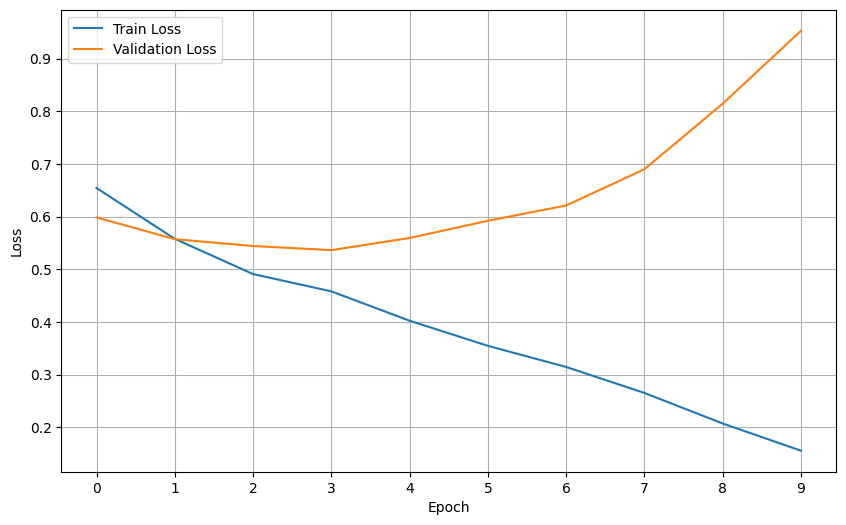

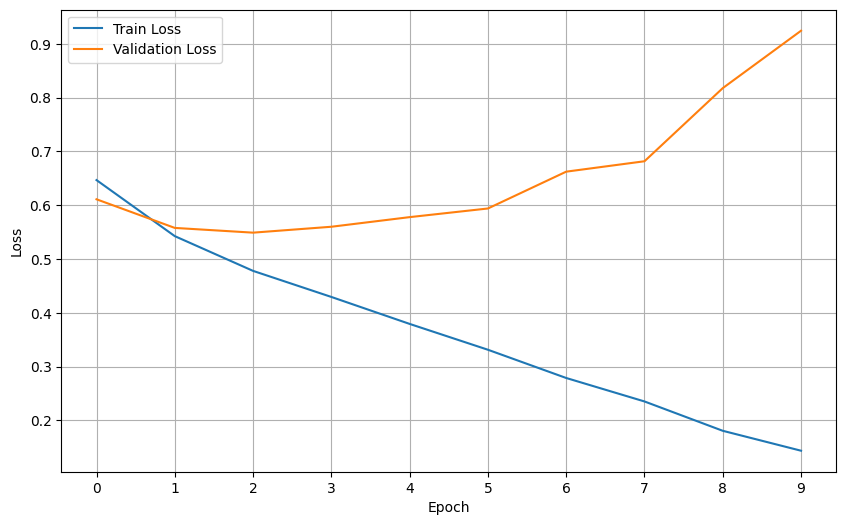

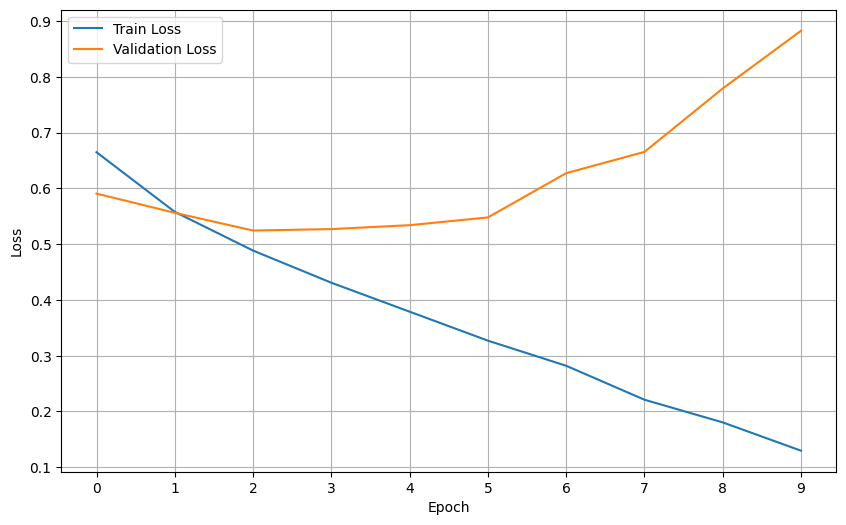

In [10]:
# Plot the loss graph
pipeline_llm_5.plot_loss()
pipeline_llm_10.plot_loss()
pipeline_llm_20.plot_loss()